In [329]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split


In [330]:
df = pd.read_excel("HousingData.xlsx")
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296,15.3,4.98,24000
1,0.08829,12.5,7.87,0.524,6.012,66.6,5.5605,311,15.2,12.43,22900
2,0.14455,12.5,7.87,0.524,6.172,96.1,5.9505,311,15.2,19.15,27100
3,0.21124,12.5,7.87,0.524,5.631,100.0,6.0821,311,15.2,29.93,16500
4,0.17004,12.5,7.87,0.524,6.004,85.9,6.5921,311,15.2,17.10,18900


In [331]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     441 non-null    float64
 1   ZN       441 non-null    float64
 2   INDUS    441 non-null    float64
 3   NOX      441 non-null    float64
 4   RM       441 non-null    float64
 5   AGE      441 non-null    float64
 6   DIS      441 non-null    float64
 7   TAX      441 non-null    int64  
 8   PTRATIO  441 non-null    float64
 9   LSTAT    441 non-null    float64
 10  PRICE    441 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 38.0 KB


,count,mean,std,min,25%,50%,75%,max
CRIM,441.0,4.137003,9.098257,0.00632,0.12269,0.40202,4.75237,88.9762
ZN,441.0,13.038549,24.543901,0.00000,0.00000,0.00000,20.00000,100.0000
INDUS,441.0,11.678481,6.802334,0.46000,5.86000,9.90000,18.10000,27.7400
NOX,441.0,0.564192,0.120025,0.38500,0.44800,0.54400,0.64700,0.8710
RM,441.0,6.272340,0.725461,3.56100,5.87500,6.20800,6.62900,8.7800
AGE,441.0,70.378231,28.560350,2.90000,45.60000,82.50000,95.00000,100.0000
DIS,441.0,3.737616,2.179838,1.12960,1.99290,2.89440,5.11670,12.1265
TAX,441.0,428.034014,169.897994,187.00000,293.00000,384.00000,666.00000,711.0000
PTRATIO,441.0,18.469161,2.258550,12.60000,17.30000,19.10000,20.20000,22.0000
LSTAT,441.0,13.225601,7.385932,1.73000,7.19000,12.33000,17.60000,37.9700


Price is the output

In [332]:
dup = df[df.duplicated()]
print(dup)

Empty DataFrame
Columns: [CRIM, ZN, INDUS, NOX, RM, AGE, DIS, TAX, PTRATIO, LSTAT, PRICE]
Index: []


Define the output variables and lits the other variables

In [333]:
output_var = "PRICE"
features = df.columns.drop(output_var).to_list()
print(features)

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']


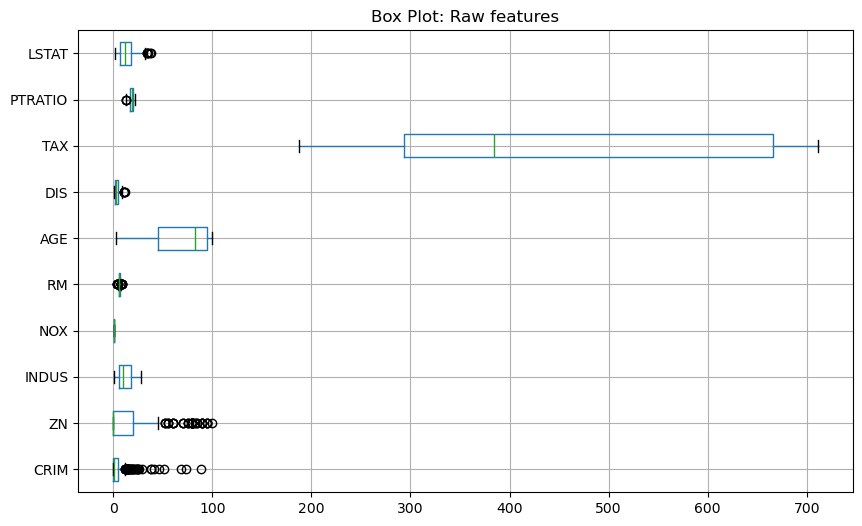

In [334]:
fig, ax = plt.subplots(figsize = (10,6))
boxplot = df[features].boxplot(vert =0, ax = ax)
_ = ax.set_title(f'Box Plot: Raw features')

In [335]:
df['NOX'] = df['NOX']*100
df['RM'] = df['RM']*10
df['TAX'] = df['TAX']/10
df['DIS'] = df['DIS']*6
df['PTRATIO'] =  df['PTRATIO']*3

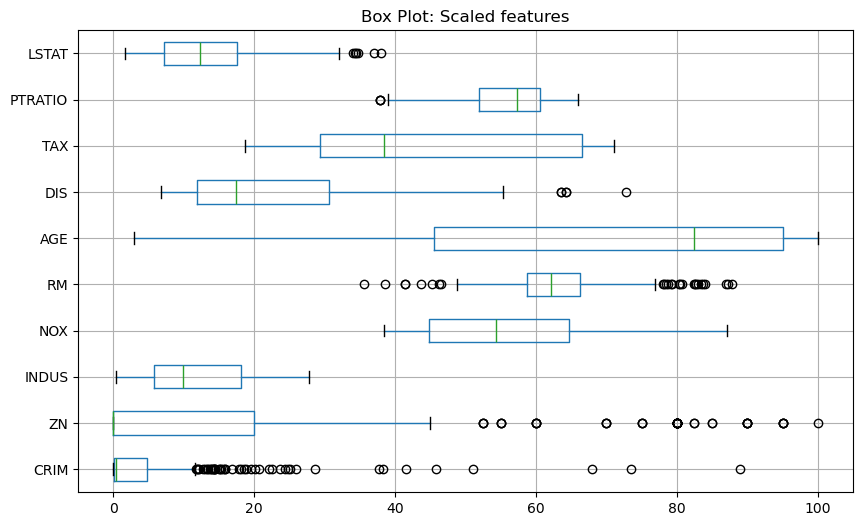

In [336]:
fig, ax = plt.subplots(figsize =(10,6))
boxplot = df[features].boxplot(vert = 0, ax = ax)
_ = ax.set_title(f'Box Plot: Scaled features')

CRIM has a lot of outliers 

<class 'pandas.core.frame.DataFrame'>
Index: 387 entries, 0 to 440
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     387 non-null    float64
 1   ZN       387 non-null    float64
 2   INDUS    387 non-null    float64
 3   NOX      387 non-null    float64
 4   RM       387 non-null    float64
 5   AGE      387 non-null    float64
 6   DIS      387 non-null    float64
 7   TAX      387 non-null    float64
 8   PTRATIO  387 non-null    float64
 9   LSTAT    387 non-null    float64
 10  PRICE    387 non-null    int64  
dtypes: float64(10), int64(1)
memory usage: 36.3 KB


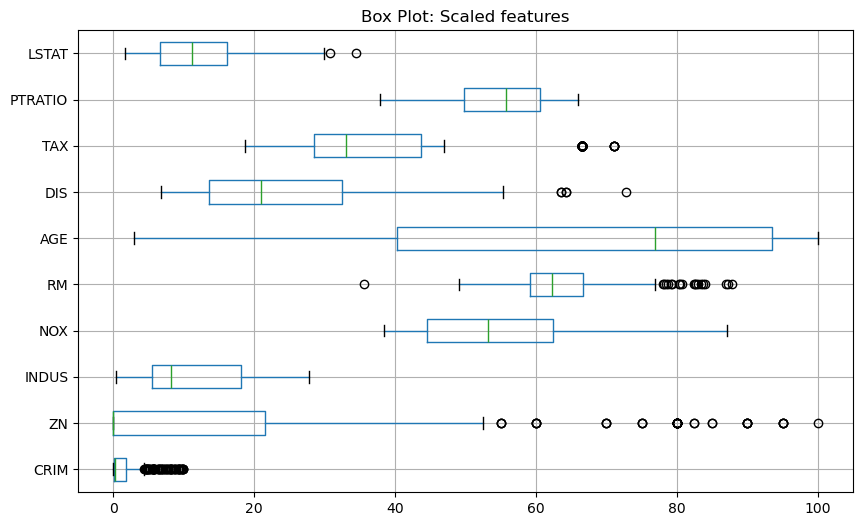

In [337]:
df = df[df['CRIM'] <= 10] # removes all the data that has crime less than 10
fig, ax = plt.subplots(figsize =(10,6))
boxplot = df[features].boxplot(vert = 0, ax = ax)
_ = ax.set_title(f'Box Plot: Scaled features')
df.info()

Now we have 387 entries

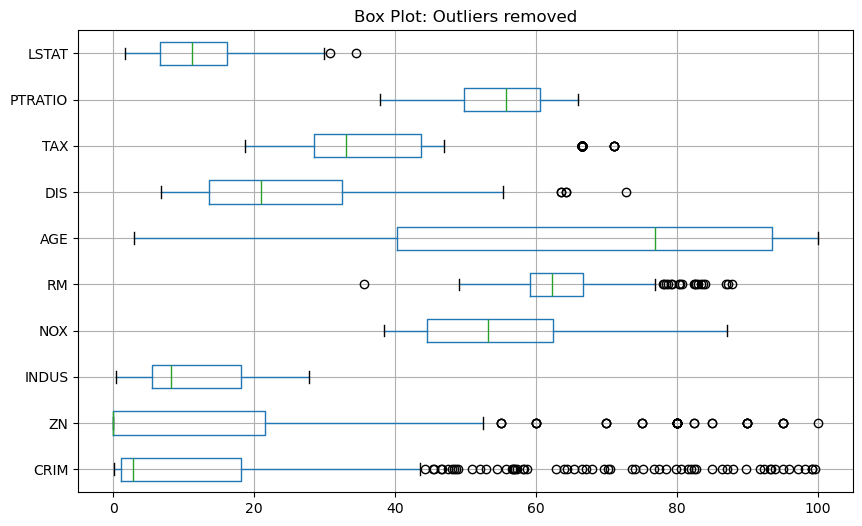

In [338]:
df['CRIM'] = df['CRIM']*10 #RESCALE 
fig, ax = plt.subplots(figsize =(10,6))
boxplot = df[features].boxplot(vert = 0, ax = ax)
_ = ax.set_title(f'Box Plot: Outliers removed')

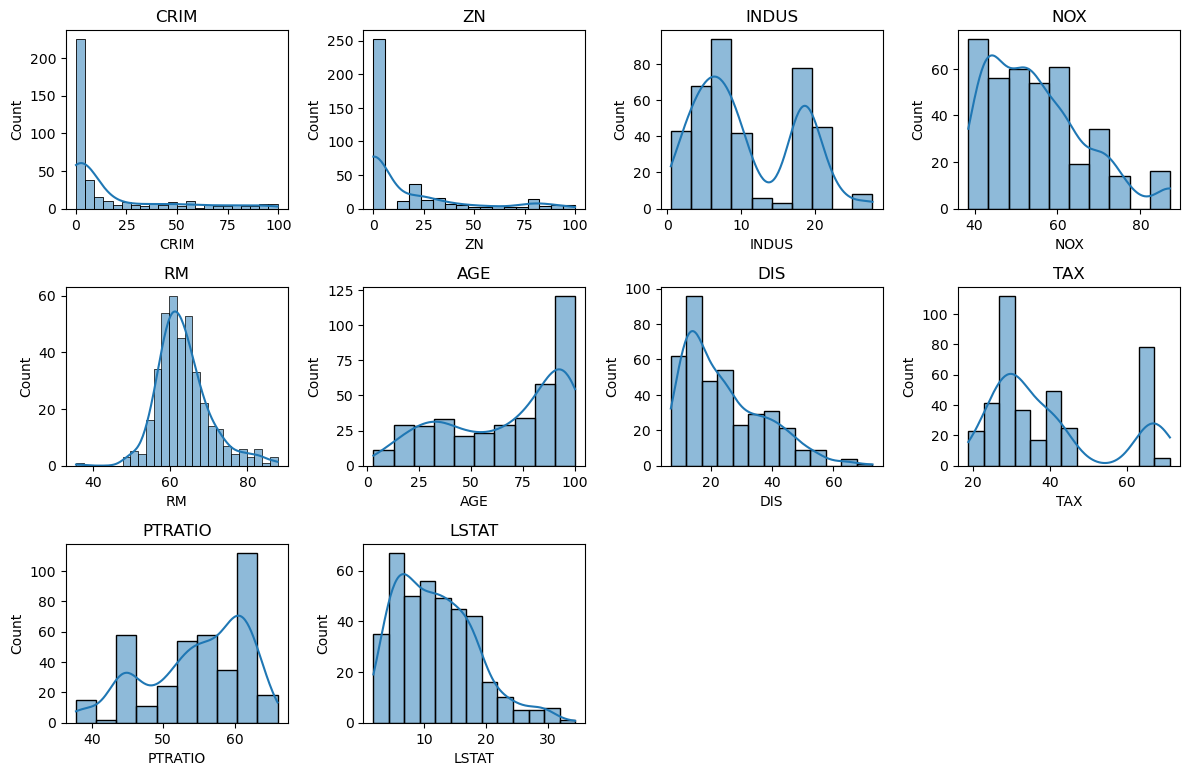

In [339]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(features):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

In [340]:
df.loc[:, "CRIM"] = 10*np.log(df["CRIM"])
df.loc[:, "LSTAT"] = 10*np.log(df["LSTAT"])
df.loc[:, "DIS"] = 10*np.log(df["DIS"])
df.loc[:, 'ZN'] = 10*np.log1p(df['ZN'])  # log(1 + ZN)


Top doies transformationadn scaling in one 

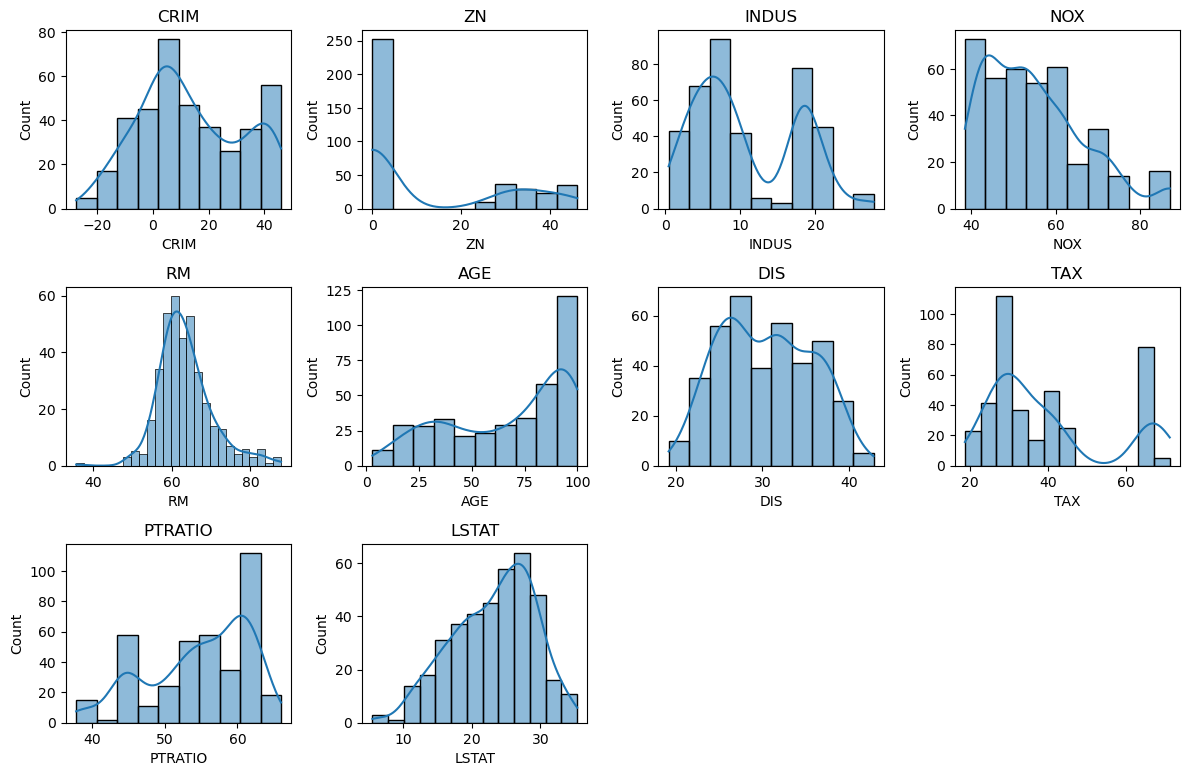

In [341]:
plt.figure(figsize=(12, 10))
for i, col in enumerate(features):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

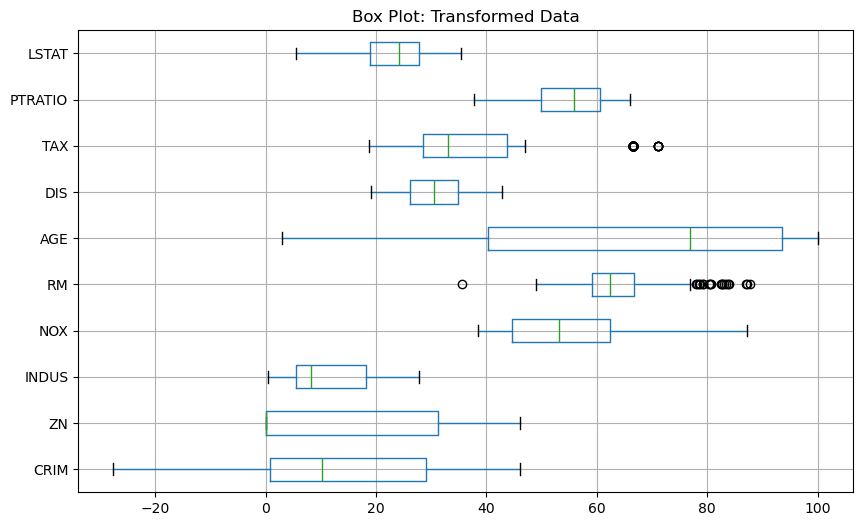

In [342]:
fig, ax = plt.subplots(figsize =(10,6))
boxplot = df[features].boxplot(vert = 0, ax = ax)
_ = ax.set_title(f'Box Plot: Transformed Data')

In [343]:
X = df[features]
y = df[output_var]
display(X.head(), y.head())
 

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT
0,-27.614510,29.444390,2.31,53.8,65.75,65.2,32.003044,29.6,45.9,16.054299
1,-1.245433,26.026897,7.87,52.4,60.12,66.6,35.074475,31.1,45.6,25.201129
2,3.684553,26.026897,7.87,52.4,61.72,96.1,35.752347,31.1,45.6,29.523027
3,7.478247,26.026897,7.87,52.4,56.31,100.0,35.971095,31.1,45.6,33.988613
4,5.308635,26.026897,7.87,52.4,60.04,85.9,36.776314,31.1,45.6,28.390785


0    24000
1    22900
2    27100
3    16500
4    18900
Name: PRICE, dtype: int64

In [344]:
degree = 2  
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly.shape
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=90)

In [345]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

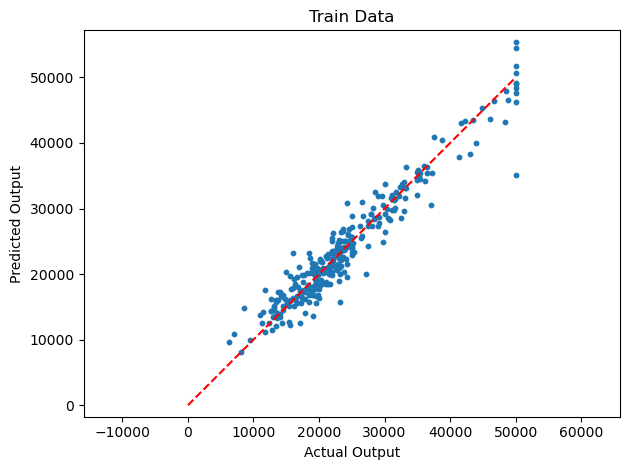

In [347]:
plt.scatter(y_train, y_train_pred, s=10)
plt.plot([0, y_train.max()], [0, y_train.max()], color = 'red', linestyle='dashed')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.axis('equal')
plt.title('Train Data')
plt.tight_layout()

 

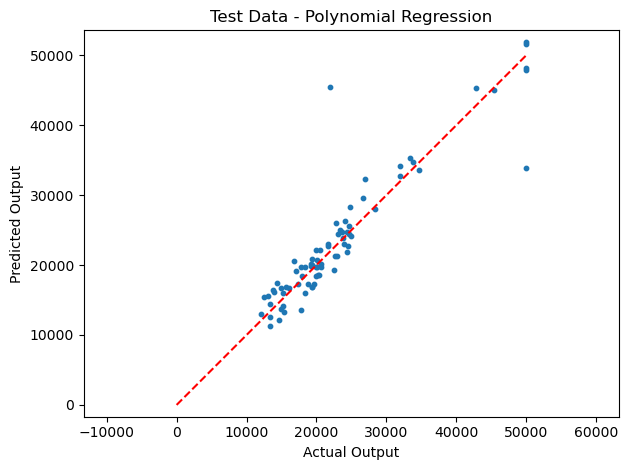

In [348]:

plt.scatter(y_test, y_test_pred, s=10)
plt.plot([0, y_test.max()], [0, y_test.max()], color = 'red', linestyle='dashed')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.axis('equal')
plt.title('Test Data - Polynomial Regression')
plt.tight_layout()

In [349]:
train_mae =  np.round(mean_absolute_error(y_train, y_train_pred),3 )
train_mse =  np.round(mean_squared_error(y_train, y_train_pred),3)
train_rmse = np.round(np.sqrt(train_mse),3)

print('COMPARISON OF METRICS - TRAINING DATA')
print(f'Training MAE   : {train_mae}')
print(f'Training MSE   : {train_mse}')
print(f'Training RMSE  : {train_rmse}')

COMPARISON OF METRICS - TRAINING DATA
Training MAE   : 1730.355
Training MSE   : 5676734.336
Training RMSE  : 2382.59


In [350]:
test_mae =  np.round(mean_absolute_error(y_test, y_test_pred),3) 
test_mse =  np.round(mean_squared_error(y_test, y_test_pred),3)
test_rmse = np.round(np.sqrt(test_mse),3)

print('COMPARISON OF METRICS - TEST DATA')
print(f'Testing MAE   : {test_mae}')
print(f'Testing MSE   : {test_mse}')
print(f'Testing RMSE  : {test_rmse}')

COMPARISON OF METRICS - TEST DATA
Testing MAE   : 2103.875
Testing MSE   : 14042401.194
Testing RMSE  : 3747.319
